In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('jobs.csv')
df[:5]

,Year,Month,jobs
0,1939,Jan,912.0
1,1940,Jan,980.0
2,1941,Jan,1201.0
3,1942,Jan,1756.0
4,1943,Jan,2956.0


### Convert this data into a time series

* First, convert the Year to a string
    * df['Year'] = df['Year'].astype(str)
* Then, create a column called "DateString" of the form "Jan 2011" (i.e., Month followed by Year, with a space in between)
* Convert this to the Pandas datetime format and save it in a column called "Date"
    * See pd.to_datetime(df['DateString'])
* Sort the DataFrame so that the dates are in increasing order, and then set Date as the index.

In [4]:
df['Year'] = df['Year'].astype(str)
df['DateString'] = df['Month'] + ' ' + df['Year']
df['Date']= pd.to_datetime(df['DateString'])
df2 = df.sort_values(by='Date').set_index('Date')

### Plot the jobs numbers as a time series

Also plot the 1-year and 5-year moving averages.
Label these appropriately in a legend.

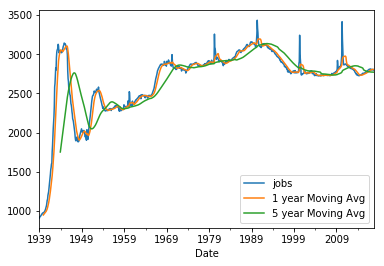

In [5]:
df2['jobs'].plot(label='jobs')
df2['jobs'].rolling(window=12).mean().plot(label='1 year Moving Avg')
df2['jobs'].rolling(window=12*5).mean().plot(label='5 year Moving Avg')
legend(loc='best')

### Deviations from moving average

Find the dates where the jobs number was at least 500 more than the 1-year moving average

In [6]:
df2[df2['jobs'] >= df2['jobs'].rolling(window=12).mean() + 500]

,Year,Month,jobs,DateString
Date,,,,
1942-08-01,1942,Aug,2583.0,Aug 1942
1942-09-01,1942,Sep,2630.0,Sep 1942
1942-10-01,1942,Oct,2734.0,Oct 1942
1942-11-01,1942,Nov,2825.0,Nov 1942
1943-01-01,1943,Jan,2956.0,Jan 1943
1943-02-01,1943,Feb,3027.0,Feb 1943
2010-05-01,2010,May,3416.0,May 2010


### Another kind of deviation

Find the dates where the jobs number was at least 500 more than the jobs number 1 year earlier **and** at least 500 more than the number 1 year later.

In [33]:
df2[(df2['jobs'] > df2['jobs'].shift(-12) + 500) & (df2['jobs'] > df2['jobs'].shift(12) + 500)]

,Year,Month,jobs,DateString
Date,,,,
2010-05-01,2010,May,3416.0,May 2010
